In [18]:
import os
import pandas as pd
import numpy as np
from matplotlib import image
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pathtest = '/content/drive/MyDrive/Alzheimer_s Dataset-2/test'
pathtrain = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train'

In [7]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [8]:
class1 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/VeryMildDemented' 
class2 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/MildDemented'
class3 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/ModerateDemented'
class0 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/NonDemented'


In [9]:
def file_append(class_path):    
    image_array = []    
    curr_path = os.path.join(os.getcwd(),class_path)  
    cnt = 0
    file_list = [k for k in os.listdir(curr_path) if '.jpg' in k]
    
    for x in file_list:    
        img_path = os.path.join(curr_path,x) 
        img = imread(img_path)
        img = resize(img,(60,60,3))    
        img = img.flatten()
        image_array.append(img)
        
    return image_array
class1_img = file_append(class1)
class2_img = file_append(class2)
class3_img = file_append(class3)
class0_img = file_append(class0)

In [10]:

df1 = pd.DataFrame(class1_img)
df1['y']  = 1  
df2 = pd.DataFrame(class2_img)
df2['y']  = 2
df3 = pd.DataFrame(class3_img)
df3['y']  = 3
df0 = pd.DataFrame(class0_img)
df0['y']  = 0

df = pd.concat([df0,df1,df2,df3],ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [12]:
df.shape

(5121, 10801)

<AxesSubplot:>

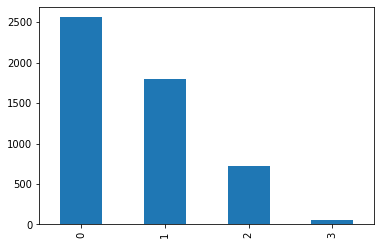

In [13]:
df['y'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Class Wise Distribution of data')

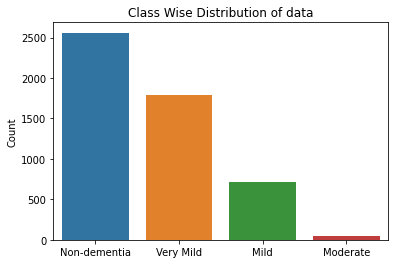

In [14]:
sns.barplot(x =['Non-dementia','Very Mild', 'Mild', 'Moderate'],y = df['y'].value_counts())
plt.ylabel('Count')
plt.title('Class Wise Distribution of data')

In [19]:
X,y = df[df.columns[:-1]],df['y']

In [20]:
X.shape

(5121, 10800)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
print(y.shape)
y = to_categorical(y, num_classes=4) # One-hot encoding para minimizar error de 10 clases
print(y.shape)

(5121,)
(5121, 4)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=121)

In [24]:
y_train.shape

(4096, 4)

In [25]:
data_pipe = Pipeline(
    [
        ('scaler', StandardScaler()), 
        ('pca',PCA(n_components=0.9)) #redudir dimencionalidad
    ]
)

In [26]:
data_pipe.fit(X_train)

X_train = data_pipe.transform(X_train)
#al test solo transform
X_test = data_pipe.transform(X_test)

In [27]:
print(f"Original Data dimension: {df.shape[1]} features")
print(f"After PCA Data dimension: {X_train.shape[1]} features")

Original Data dimension: 10801 features
After PCA Data dimension: 384 features


In [28]:
data_pipe.named_steps['pca'].explained_variance_ratio_

array([0.19447156, 0.09377833, 0.06207524, 0.02675957, 0.01965795,
       0.01455718, 0.01173944, 0.01043307, 0.00926906, 0.00678271,
       0.0063174 , 0.00588752, 0.00561745, 0.00521225, 0.00490471,
       0.0046978 , 0.00465273, 0.00444409, 0.00433273, 0.00429219,
       0.00407961, 0.00398261, 0.00380986, 0.00372566, 0.00371258,
       0.00358088, 0.0034802 , 0.00336328, 0.00331345, 0.00325862,
       0.00324765, 0.00315963, 0.00314478, 0.00304737, 0.00301296,
       0.00297982, 0.00293479, 0.00291252, 0.00288997, 0.00287413,
       0.00277686, 0.00272357, 0.00268003, 0.00263608, 0.00261118,
       0.00257448, 0.00252184, 0.00250659, 0.0024861 , 0.00245771,
       0.00244645, 0.00242257, 0.00236234, 0.00234347, 0.00230993,
       0.00229363, 0.00224385, 0.00224   , 0.0022177 , 0.0021815 ,
       0.00216185, 0.00215442, 0.00214388, 0.00210106, 0.00206282,
       0.00203389, 0.00200657, 0.00198593, 0.00197009, 0.00196027,
       0.00194355, 0.00192867, 0.00192442, 0.00192109, 0.00188